# Microsoft Stock- Time Series Analysis

# About Dataset

### Context
This file contains the stock information of Microsoft from 04/01/2015 to 04/01/2021

### Content
This data was acquired in google sheets using the command 'GOOGLEFINANCE'

### Inspiration
With this data you can do basic EDA and use predictive analysis.

## column :
 - Open (Opening price): float
 - High (Highest value of the day) : float 
 - Low (Lowest value of the day) : float
 - Close (Closing price) : float
 - Volume (Number of shares traded on that day) int

In [32]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l1, l2
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
dataset = pd.read_csv("../data/Microsoft_Stock.csv")
dataset.head()
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.set_index('Date', inplace=True)
dataset.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [29]:
dataset['year'] = dataset.index.year
dataset['month'] = dataset.index.month
dataset['day'] = dataset.index.day
dataset['hour'] = dataset.index.hour

,Open,High,Low,Close,Volume,year,month,day,hour
Date,,,,,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,2015,4,1,16
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,2015,4,2,16
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,2015,4,6,16
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,2015,4,7,16
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,2015,4,8,16
...,...,...,...,...,...,...,...,...,...
2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853,2021,3,25,16
2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853,2021,3,26,16
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455,2021,3,29,16


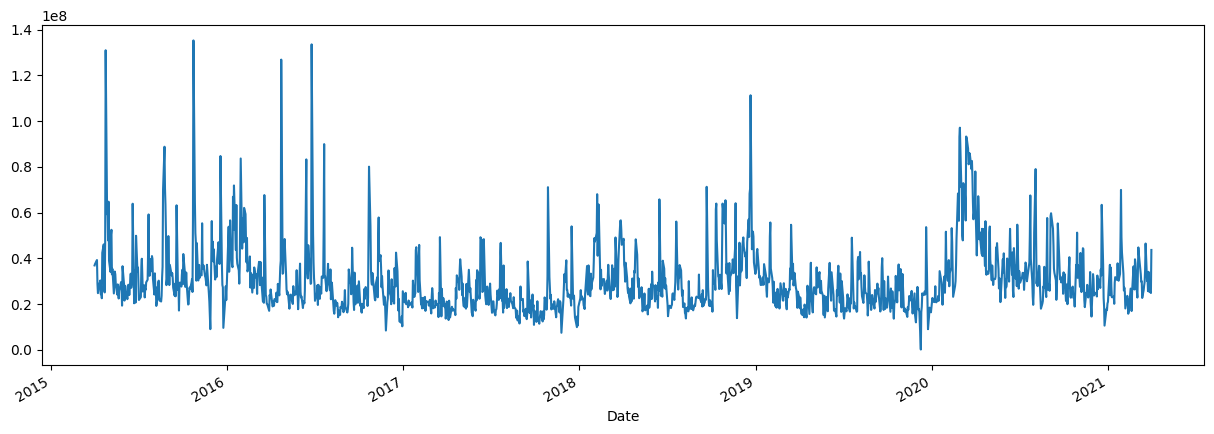

In [30]:
dataset['Volume'].plot(figsize=(15,5))
plt.show()

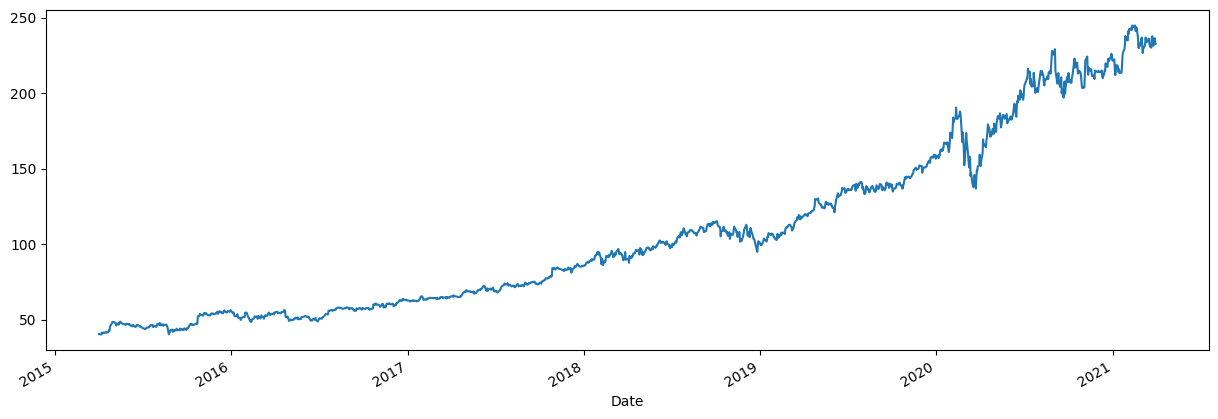

In [31]:
dataset['Open'].plot(figsize=(15,5))
plt.show()

In [33]:
features = dataset[["Open","High","Low","Volume"]]
# Open, High, Low, dan Volume
target = dataset['Close']  # Target

In [16]:
scaler_features = MinMaxScaler()
features_scaled = scaler_features.fit_transform(features)

scaler_target = MinMaxScaler()
target_scaled = scaler_target.fit_transform(target.values.reshape(-1, 1))
# Normalisasi data
train_features, test_features, train_target, test_target = train_test_split(
    features_scaled, target_scaled, test_size=0.2, shuffle=False,random_state=42)

print("train features",train_features.shape)
print("train target",train_target.shape)

train features (1208, 4)
train target (1208, 1)


In [18]:
def create_sequences(X, y, timesteps):
    Xs, ys = [], []
    for i in range(len(X) - timesteps):
        Xs.append(X[i:i+timesteps])
        ys.append(y[i+timesteps])
    return np.array(Xs), np.array(ys)

sequence_length = 10
X_train, y_train = create_sequences(train_features, train_target, sequence_length)
X_test, y_test = create_sequences(test_features, test_target, sequence_length)

print("X_train" ,X_train.shape)
print("y_train" ,y_train.shape)

print("X_test" ,X_test.shape)
print("y_test" ,y_test.shape)

X_train (1198, 10, 4)
y_train (1198, 1)
X_test (293, 10, 4)
y_test (293, 1)


In [48]:
def build_model():
    model = Sequential()
    model.add(GRU(units=128, return_sequences=True,kernel_regularizer=l2(0.002),input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation="linear"))
    model.compile(optimizer="adam", loss='mean_squared_error', metrics=["accuracy"])
    model.summary()
    return model


model = build_model()

d:\cursor_code\python\Lstm\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                     │ (None, 10, 128)        │        51,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10, 1)          │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,585 (201.50 KB)

 Trainable params: 51,585 (201.50 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train,callbacks=[early_stopping],  epochs=50, batch_size=32, validation_split=0.2, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.0000e+00 - loss: 0.0380 - val_accuracy: 0.0031 - val_loss: 0.0383
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0107 - val_accuracy: 0.0031 - val_loss: 0.0242
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0068 - val_accuracy: 0.0034 - val_loss: 0.0168
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0052 - val_accuracy: 0.0034 - val_loss: 0.0131
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0042 - val_accuracy: 0.0034 - val_loss: 0.0108
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.0000e+00 - loss: 0.0036 - val_accuracy: 0.0034 - val_loss: 0.0092
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0031 - val_accuracy: 0.0034 - val_loss: 0.0081
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0000e+00 - loss: 0.

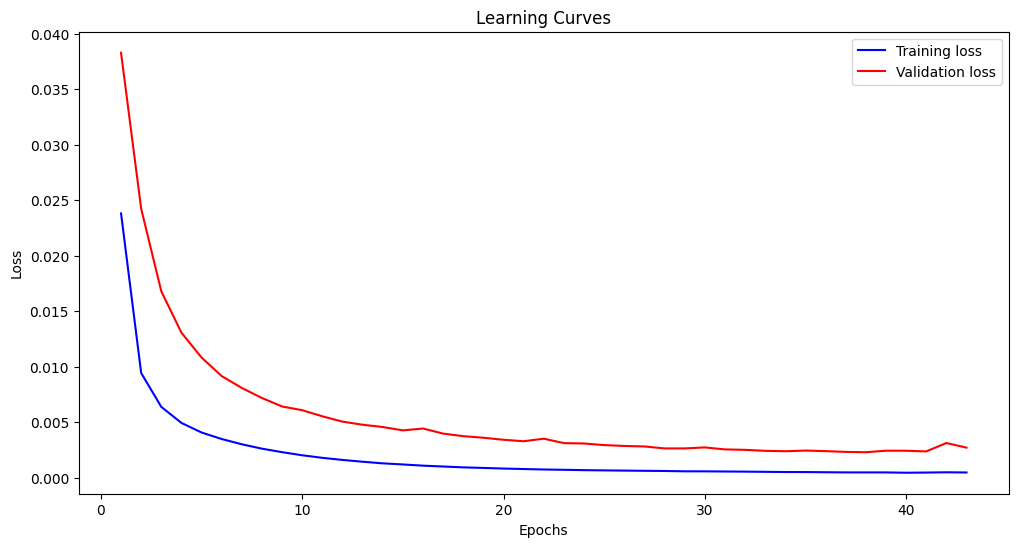

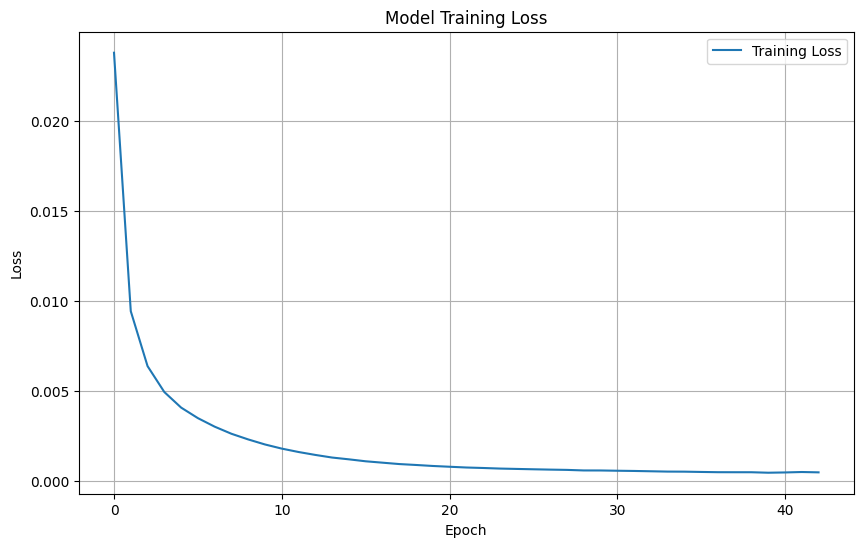

In [50]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss'], loc='upper right')
plt.grid(True)
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


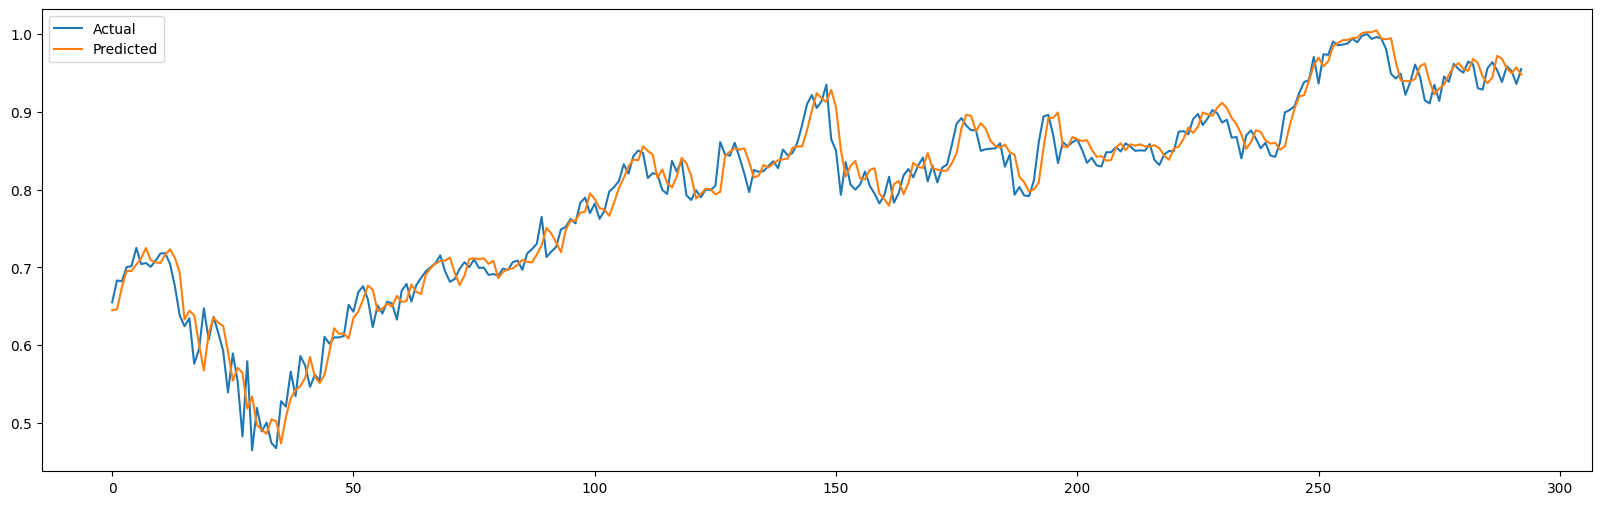

In [51]:
predictions = model.predict(X_test)
predictions_last = predictions[:, -1, 0]
plt.figure(figsize=(20, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions_last, label='Predicted')
plt.legend()
plt.show()


In [52]:
r2 = r2_score(y_test, predictions_last)
r2


0.9651923511305438

In [53]:
np.square(mean_squared_error(predictions_last, y_test))


# 2.6791815751997014e-07

2.6791815751997014e-07